In [37]:
import sys
import os
import pandas as pd

# Add the root directory of the project to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# importing the functions
# from sentiment_analysis.data_preprocessing.processing_pipeline import preprocess_data, save_preprocessed_data, load_data
from data_preprocessing.processing_text import preprocess_text
from data_preprocessing.text_cleaning import clean_text
from data_preprocessing.lemmatize import lemmatize_tokens
from data_preprocessing.remove_stopword import remove_stopwords  
from data_preprocessing.tokenizer import tokenize_text
# from data_preprocessing.word_embedding import vectorize_text
from data_preprocessing.detect_language import detect_english, filter_english_reviews

In [44]:
import pandas as pd
df = pd.read_csv(r'E:\sentiment_analysis\notebooks\ticket-user-reviews.csv')
df

comment  rate  \
0                                          easy and fast   5.0   
1      We traveled from Phnom Penh to Siem Reap by Se...   5.0   
2      Booking tickets thru bookmebus.com is always e...   5.0   
3                                                    NaN   5.0   
4      In Mekong express There was no wifi. The drive...   1.2   
...                                                  ...   ...   
24527  really bad service, wrong boarding point, loca...   0.0   
24528                                                NaN   3.4   
24529  Highly recommend. One of the most plesant trip...   5.0   
24530  driver did not show up and no information from...   0.0   
24531                                                NaN   0.0   

                    created_at                  operator_name  
0      2016-04-22 12:59:28 UTC                        CamPost  
1      2016-08-14 04:01:37 UTC     Seila Angkor Khmer Express  
2      2016-10-01 11:06:40 UTC              Virak Buntham Old  
3      2016-10-13 13:05:21 UTC                delete khai nam  
4      2017-01-25 12:32:54 UTC                 Mekong Express  
...                        ...                            ...  
24527  2025-03-21 19:24:36 UTC  Chan Moly Roth Transportation  
24528  2025-03-23 06:30:17 UTC               Kim Seng Express  
24529  2025-03-23 15:16:59 UTC            VET Air Bus Express  
24530  2025-03-24 06:17:46 UTC             SAM'S TAXI SERVICE  
24531  2025-03-24 06:19:41 UTC             SAM'S TAXI SERVICE  

[24532 rows x 4 columns]

#### Data preprocessing

1. Checking Data shape and info

In [45]:
print("df.shape:", df.shape)
print("df.info:", df.info())

df.shape: (24532, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24532 entries, 0 to 24531
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   comment        14934 non-null  object 
 1   rate           24532 non-null  float64
 2   created_at     24532 non-null  object 
 3   operator_name  24532 non-null  object 
dtypes: float64(1), object(3)
memory usage: 766.8+ KB
df.info: None


2. Checking null value

In [46]:
# Check for missing values
df.isnull().sum()

comment          9598
rate                0
created_at          0
operator_name       0
dtype: int64

3. Removing null value

Any rows that contain no review text will be removed for now to be ready for model training.

In [47]:
#drop missing values
df.dropna(inplace=True)

In [48]:
df.shape

(14934, 4)

In [49]:
#checking duplicate
# Find duplicate rows (where all columns are the same)
duplicates = df[df.duplicated(keep=False)]  # keep=False shows all occurrences

# Display duplicate rows
print(f"Total duplicate rows found: {duplicates.shape[0]}")
print(duplicates)


Total duplicate rows found: 178
                                                 comment  rate  \
38     I had a direct night bus ticket with that comp...   1.4   
39     I had a direct night bus ticket with that comp...   1.4   
1146   empty bus, flood situation,  but driver safe d...   5.0   
1147   empty bus, flood situation,  but driver safe d...   5.0   
1268   We were promised pickup service by the company...   4.0   
...                                                  ...   ...   
22539  Prompt departure.\r\nIn respect of safety, lif...   5.0   
23055  30min vor Abfahrt mitm tuktuk zur Busstation g...   5.0   
23056  30min vor Abfahrt mitm tuktuk zur Busstation g...   5.0   
23661  Older silver color bus had no wifi.  Air Con a...   2.6   
23662  Older silver color bus had no wifi.  Air Con a...   2.6   

                    created_at            operator_name  
38     2017-01-31 01:09:25 UTC        Virak Buntham Old  
39     2017-01-31 01:09:25 UTC        Virak Buntham Old  
1

In [50]:
df.drop_duplicates(keep='first', inplace=True)


In [51]:
print(df.duplicated().sum())  # Should print 0 if all duplicates are removed

0


In [52]:
#checking data shape again
print("df.shape:", df.shape)

df.shape: (14827, 4)


In [53]:
# %pip install dateparser

In [32]:
# import dateparser

# def convert_relative_date(date_str):
#     """Convert relative date strings like 'about a year ago' to standard YYYY-MM-DD format."""
#     if not date_str or not isinstance(date_str, str):  # Handle empty or non-string values
#         return None
#     parsed_date = dateparser.parse(date_str)
#     return parsed_date.strftime('%Y-%m-%d') if parsed_date else None

# # Apply conversion to the date column
# df['Date'] = df['Date'].apply(lambda x: convert_relative_date(str(x)))



In [33]:
# df['Date']

#### Handle NaT Date column

In [55]:
# Convert 'Date' to datetime (handle errors and avoid conversion failure)
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['created_at'] = df['created_at'].dt.tz_localize(None)
# # Calculate the median date (ignoring NaT values)
# median_date = df['Date'].median()

# # Fill NaT values with the median date
# df['Date'].fillna(median_date, inplace=True)

# # Ensure the column is datetime type
# df['Date'] = pd.to_datetime(df['Date']) 

# # Check if everything worked correctly
# print(df['Date'].dtype)  # Should be datetime64[ns]
# print(df['Date'].isna().sum())  # Should be 0 (no missing values)


In [ ]:
# none_count = df['Date'].isna().sum()
# print(none_count)

0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14827 entries, 0 to 24530
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   comment        14827 non-null  object        
 1   rate           14827 non-null  float64       
 2   created_at     14827 non-null  datetime64[ns]
 3   operator_name  14827 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 579.2+ KB


In [57]:
df = df.rename(columns={'comment': 'Review', 'created_at': 'Date', 'rating': 'Rating', 'operator_name': 'Company Name'})

### Detect only English Language 

In [58]:
df_filtered = filter_english_reviews(df)
df_filtered.to_csv("cleaned_reviews.csv", index=False)

Debug: Language probabilities for 'easy and fast': [en:0.9999974421252278]
Debug: Language probabilities for 'we traveled from phnom penh to siem reap by seila angkor van the driver was professional and it was a smooth ride it took us only 5 hours to get to siem reap including one short stay at gas station and lunch break at kompong thom for 30 minutes': [en:0.9999975770533149]
Debug: Language probabilities for 'booking tickets thru bookmebuscom is always easy and reliable my guests were fetched at the guesthouse as requested travelling with virak buntham transport makes my guests feel safe': [en:0.9999972483530575]
Debug: Language probabilities for 'in mekong express there was no wifi the driver was running very very fast and after all we did 545h and not 5h which was said to internet pageoveralworse trip ever': [en:0.9999976186848035]
Debug: Language probabilities for 'trip went smoothly border crossing was easy food and beverage provided free tuk tuk ride to hostel if you want it i 

#### Text Processing

In [59]:
df_filtered['cleaned_review'] = df_filtered["Review"].apply(lambda x: clean_text(str(x)))
df_filtered

Review  rate  \
0                                          easy and fast   5.0   
1      We traveled from Phnom Penh to Siem Reap by Se...   5.0   
2      Booking tickets thru bookmebus.com is always e...   5.0   
4      In Mekong express There was no wifi. The drive...   1.2   
5      Trip went smoothly, border crossing was easy, ...   4.0   
...                                                  ...   ...   
24522  Power for phone didn’t work. Need English spea...   3.4   
24523  Power for phone didn’t work. Need English spea...   3.4   
24527  really bad service, wrong boarding point, loca...   0.0   
24529  Highly recommend. One of the most plesant trip...   5.0   
24530  driver did not show up and no information from...   0.0   

                     Date                   Company Name  \
0     2016-04-22 12:59:28                        CamPost   
1     2016-08-14 04:01:37     Seila Angkor Khmer Express   
2     2016-10-01 11:06:40              Virak Buntham Old   
4     2017-01-25 12:32:54                 Mekong Express   
5     2017-01-26 10:57:50                       Nattakan   
...                   ...                            ...   
24522 2025-03-21 03:12:01             Mey Hong Transport   
24523 2025-03-21 03:12:07             Mey Hong Transport   
24527 2025-03-21 19:24:36  Chan Moly Roth Transportation   
24529 2025-03-23 15:16:59            VET Air Bus Express   
24530 2025-03-24 06:17:46             SAM'S TAXI SERVICE   

                                          cleaned_review  
0                                          easy and fast  
1      we traveled from phnom penh to siem reap by se...  
2      booking tickets thru bookmebuscom is always ea...  
4      in mekong express there was no wifi the driver...  
5      trip went smoothly border crossing was easy fo...  
...                                                  ...  
24522  power for phone didn’t work need english speak...  
24523  power for phone didn’t work need english speak...  
24527  really bad service wrong boarding point locati...  
24529  highly recommend one of the most plesant trip ...  
24530  driver did not show up and no information from...  

[14103 rows x 5 columns]

In [60]:
df_cleaned_token = df_filtered['cleaned_review'].apply(lambda x: tokenize_text(str(x)))
df_cleaned_token

0                                        [easy, and, fast]
1        [we, traveled, from, phnom, penh, to, siem, re...
2        [booking, tickets, thru, bookmebuscom, is, alw...
4        [in, mekong, express, there, was, no, wifi, th...
5        [trip, went, smoothly, border, crossing, was, ...
                               ...                        
24522    [power, for, phone, did, n’t, work, need, engl...
24523    [power, for, phone, did, n’t, work, need, engl...
24527    [really, bad, service, wrong, boarding, point,...
24529    [highly, recommend, one, of, the, most, plesan...
24530    [driver, did, not, show, up, and, no, informat...
Name: cleaned_review, Length: 14103, dtype: object

In [61]:
df_remove_stopword = df_cleaned_token.apply(remove_stopwords)
df_remove_stopword

0                                             [easy, fast]
1        [traveled, phnom, penh, siem, reap, seila, ang...
2        [booking, tickets, bookmebuscom, easy, reliabl...
4        [mekong, express, no, wifi, driver, running, v...
5        [trip, went, smoothly, border, crossing, easy,...
                               ...                        
24522    [power, phone, work, need, english, speaker, a...
24523    [power, phone, work, need, english, speaker, a...
24527    [bad, service, wrong, boarding, point, locatio...
24529             [highly, recommend, plesant, trip, asia]
24530    [driver, not, no, information, company, finall...
Name: cleaned_review, Length: 14103, dtype: object

In [62]:
df_filtered['processed_text'] = df_remove_stopword.apply(lemmatize_tokens)
df_filtered

Review  rate  \
0                                          easy and fast   5.0   
1      We traveled from Phnom Penh to Siem Reap by Se...   5.0   
2      Booking tickets thru bookmebus.com is always e...   5.0   
4      In Mekong express There was no wifi. The drive...   1.2   
5      Trip went smoothly, border crossing was easy, ...   4.0   
...                                                  ...   ...   
24522  Power for phone didn’t work. Need English spea...   3.4   
24523  Power for phone didn’t work. Need English spea...   3.4   
24527  really bad service, wrong boarding point, loca...   0.0   
24529  Highly recommend. One of the most plesant trip...   5.0   
24530  driver did not show up and no information from...   0.0   

                     Date                   Company Name  \
0     2016-04-22 12:59:28                        CamPost   
1     2016-08-14 04:01:37     Seila Angkor Khmer Express   
2     2016-10-01 11:06:40              Virak Buntham Old   
4     2017-01-25 12:32:54                 Mekong Express   
5     2017-01-26 10:57:50                       Nattakan   
...                   ...                            ...   
24522 2025-03-21 03:12:01             Mey Hong Transport   
24523 2025-03-21 03:12:07             Mey Hong Transport   
24527 2025-03-21 19:24:36  Chan Moly Roth Transportation   
24529 2025-03-23 15:16:59            VET Air Bus Express   
24530 2025-03-24 06:17:46             SAM'S TAXI SERVICE   

                                          cleaned_review  \
0                                          easy and fast   
1      we traveled from phnom penh to siem reap by se...   
2      booking tickets thru bookmebuscom is always ea...   
4      in mekong express there was no wifi the driver...   
5      trip went smoothly border crossing was easy fo...   
...                                                  ...   
24522  power for phone didn’t work need english speak...   
24523  power for phone didn’t work need english speak...   
24527  really bad service wrong boarding point locati...   
24529  highly recommend one of the most plesant trip ...   
24530  driver did not show up and no information from...   

                                          processed_text  
0                                           [easy, fast]  
1      [travel, phnom, penh, siem, reap, seila, angko...  
2      [book, ticket, bookmebuscom, easy, reliable, g...  
4      [mekong, express, no, wifi, driver, run, very,...  
5      [trip, go, smoothly, border, cross, easy, food...  
...                                                  ...  
24522  [power, phone, work, need, english, speaker, a...  
24523  [power, phone, work, need, english, speaker, a...  
24527  [bad, service, wrong, boarding, point, locatio...  
24529           [highly, recommend, plesant, trip, asia]  
24530  [driver, not, no, information, company, finall...  

[14103 rows x 6 columns]

In [63]:
df_filtered.to_csv("preprocessed_data.csv", index=False)

#### Word embedding
Converting word in "Review" column into vector

In [47]:
# !python -m spacy download en_core_web_md

In [64]:
import sys
import os
import pandas as pd
import numpy as np

# Add the root directory of the project to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the BERT embedding functions
from data_preprocessing.word_embedding import apply_bert_embeddings, convert_embeddings_to_numpy

# Apply BERT embeddings
df_filtered = apply_bert_embeddings(df_filtered, column_name="cleaned_review")

# Convert to NumPy for training
X = convert_embeddings_to_numpy(df_filtered, embedding_column="embedding")



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [65]:
df_filtered

Review  rate  \
0                                          easy and fast   5.0   
1      We traveled from Phnom Penh to Siem Reap by Se...   5.0   
2      Booking tickets thru bookmebus.com is always e...   5.0   
4      In Mekong express There was no wifi. The drive...   1.2   
5      Trip went smoothly, border crossing was easy, ...   4.0   
...                                                  ...   ...   
24522  Power for phone didn’t work. Need English spea...   3.4   
24523  Power for phone didn’t work. Need English spea...   3.4   
24527  really bad service, wrong boarding point, loca...   0.0   
24529  Highly recommend. One of the most plesant trip...   5.0   
24530  driver did not show up and no information from...   0.0   

                     Date                   Company Name  \
0     2016-04-22 12:59:28                        CamPost   
1     2016-08-14 04:01:37     Seila Angkor Khmer Express   
2     2016-10-01 11:06:40              Virak Buntham Old   
4     2017-01-25 12:32:54                 Mekong Express   
5     2017-01-26 10:57:50                       Nattakan   
...                   ...                            ...   
24522 2025-03-21 03:12:01             Mey Hong Transport   
24523 2025-03-21 03:12:07             Mey Hong Transport   
24527 2025-03-21 19:24:36  Chan Moly Roth Transportation   
24529 2025-03-23 15:16:59            VET Air Bus Express   
24530 2025-03-24 06:17:46             SAM'S TAXI SERVICE   

                                          cleaned_review  \
0                                          easy and fast   
1      we traveled from phnom penh to siem reap by se...   
2      booking tickets thru bookmebuscom is always ea...   
4      in mekong express there was no wifi the driver...   
5      trip went smoothly border crossing was easy fo...   
...                                                  ...   
24522  power for phone didn’t work need english speak...   
24523  power for phone didn’t work need english speak...   
24527  really bad service wrong boarding point locati...   
24529  highly recommend one of the most plesant trip ...   
24530  driver did not show up and no information from...   

                                          processed_text  \
0                                           [easy, fast]   
1      [travel, phnom, penh, siem, reap, seila, angko...   
2      [book, ticket, bookmebuscom, easy, reliable, g...   
4      [mekong, express, no, wifi, driver, run, very,...   
5      [trip, go, smoothly, border, cross, easy, food...   
...                                                  ...   
24522  [power, phone, work, need, english, speaker, a...   
24523  [power, phone, work, need, english, speaker, a...   
24527  [bad, service, wrong, boarding, point, locatio...   
24529           [highly, recommend, plesant, trip, asia]   
24530  [driver, not, no, information, company, finall...   

                                               embedding  
0      [-0.27553198, -0.21101826, -0.12968685, 0.0809...  
1      [0.13335821, 0.13555983, 0.008474201, 0.185786...  
2      [0.116259426, 0.19033486, 0.47892392, -0.56627...  
4      [-0.45697507, -0.3829631, 0.3658741, 0.1692846...  
5      [-0.12075686, 0.053561077, 0.45544285, -0.2103...  
...                                                  ...  
24522  [-0.12814772, -0.0127480775, 0.11388628, 0.196...  
24523  [-0.12814772, -0.0127480775, 0.11388628, 0.196...  
24527  [-0.41809857, -0.17018145, -0.017388511, -0.16...  
24529  [-0.65421367, 0.024297226, -0.15753983, -0.100...  
24530  [-0.12644754, -0.21320647, 0.16231258, -0.4119...  

[14103 rows x 7 columns]

#### Normalization for Rating column from 1-5 to -1-1

In [67]:
def normalize_rating(rating):
    return (rating - 3) / 2  # This scales 1-5 rating to -1 to 1
df_filtered['normalized_rating'] = df_filtered['rate'].apply(normalize_rating)
df_filtered

Review  rate  \
0                                          easy and fast   5.0   
1      We traveled from Phnom Penh to Siem Reap by Se...   5.0   
2      Booking tickets thru bookmebus.com is always e...   5.0   
4      In Mekong express There was no wifi. The drive...   1.2   
5      Trip went smoothly, border crossing was easy, ...   4.0   
...                                                  ...   ...   
24522  Power for phone didn’t work. Need English spea...   3.4   
24523  Power for phone didn’t work. Need English spea...   3.4   
24527  really bad service, wrong boarding point, loca...   0.0   
24529  Highly recommend. One of the most plesant trip...   5.0   
24530  driver did not show up and no information from...   0.0   

                     Date                   Company Name  \
0     2016-04-22 12:59:28                        CamPost   
1     2016-08-14 04:01:37     Seila Angkor Khmer Express   
2     2016-10-01 11:06:40              Virak Buntham Old   
4     2017-01-25 12:32:54                 Mekong Express   
5     2017-01-26 10:57:50                       Nattakan   
...                   ...                            ...   
24522 2025-03-21 03:12:01             Mey Hong Transport   
24523 2025-03-21 03:12:07             Mey Hong Transport   
24527 2025-03-21 19:24:36  Chan Moly Roth Transportation   
24529 2025-03-23 15:16:59            VET Air Bus Express   
24530 2025-03-24 06:17:46             SAM'S TAXI SERVICE   

                                          cleaned_review  \
0                                          easy and fast   
1      we traveled from phnom penh to siem reap by se...   
2      booking tickets thru bookmebuscom is always ea...   
4      in mekong express there was no wifi the driver...   
5      trip went smoothly border crossing was easy fo...   
...                                                  ...   
24522  power for phone didn’t work need english speak...   
24523  power for phone didn’t work need english speak...   
24527  really bad service wrong boarding point locati...   
24529  highly recommend one of the most plesant trip ...   
24530  driver did not show up and no information from...   

                                          processed_text  \
0                                           [easy, fast]   
1      [travel, phnom, penh, siem, reap, seila, angko...   
2      [book, ticket, bookmebuscom, easy, reliable, g...   
4      [mekong, express, no, wifi, driver, run, very,...   
5      [trip, go, smoothly, border, cross, easy, food...   
...                                                  ...   
24522  [power, phone, work, need, english, speaker, a...   
24523  [power, phone, work, need, english, speaker, a...   
24527  [bad, service, wrong, boarding, point, locatio...   
24529           [highly, recommend, plesant, trip, asia]   
24530  [driver, not, no, information, company, finall...   

                                               embedding  normalized_rating  
0      [-0.27553198, -0.21101826, -0.12968685, 0.0809...                1.0  
1      [0.13335821, 0.13555983, 0.008474201, 0.185786...                1.0  
2      [0.116259426, 0.19033486, 0.47892392, -0.56627...                1.0  
4      [-0.45697507, -0.3829631, 0.3658741, 0.1692846...               -0.9  
5      [-0.12075686, 0.053561077, 0.45544285, -0.2103...                0.5  
...                                                  ...                ...  
24522  [-0.12814772, -0.0127480775, 0.11388628, 0.196...                0.2  
24523  [-0.12814772, -0.0127480775, 0.11388628, 0.196...                0.2  
24527  [-0.41809857, -0.17018145, -0.017388511, -0.16...               -1.5  
24529  [-0.65421367, 0.024297226, -0.15753983, -0.100...                1.0  
24530  [-0.12644754, -0.21320647, 0.16231258, -0.4119...               -1.5  

[14103 rows x 8 columns]

#### Data annotation

In [68]:
df_filtered['processed_text']

0                                             [easy, fast]
1        [travel, phnom, penh, siem, reap, seila, angko...
2        [book, ticket, bookmebuscom, easy, reliable, g...
4        [mekong, express, no, wifi, driver, run, very,...
5        [trip, go, smoothly, border, cross, easy, food...
                               ...                        
24522    [power, phone, work, need, english, speaker, a...
24523    [power, phone, work, need, english, speaker, a...
24527    [bad, service, wrong, boarding, point, locatio...
24529             [highly, recommend, plesant, trip, asia]
24530    [driver, not, no, information, company, finall...
Name: processed_text, Length: 14103, dtype: object

In [69]:
# Annotate dataset
from data_annotation.annotation import annotate_data, get_sentiment_score, combine_scores, assign_sentiment_label
df_filtered['review_text_score'] = df_filtered['Review'].apply(get_sentiment_score)


In [70]:
# %pip install vaderSentiment

In [71]:

df_filtered['combined_score'] = df_filtered.apply(lambda x: combine_scores(x['normalized_rating'], x['review_text_score'], w_rating=0.4, w_text=0.6), axis=1)


In [72]:
df_filtered['sentiment_label'] = df_filtered['combined_score'].apply(assign_sentiment_label)
df_filtered

Review  rate  \
0                                          easy and fast   5.0   
1      We traveled from Phnom Penh to Siem Reap by Se...   5.0   
2      Booking tickets thru bookmebus.com is always e...   5.0   
4      In Mekong express There was no wifi. The drive...   1.2   
5      Trip went smoothly, border crossing was easy, ...   4.0   
...                                                  ...   ...   
24522  Power for phone didn’t work. Need English spea...   3.4   
24523  Power for phone didn’t work. Need English spea...   3.4   
24527  really bad service, wrong boarding point, loca...   0.0   
24529  Highly recommend. One of the most plesant trip...   5.0   
24530  driver did not show up and no information from...   0.0   

                     Date                   Company Name  \
0     2016-04-22 12:59:28                        CamPost   
1     2016-08-14 04:01:37     Seila Angkor Khmer Express   
2     2016-10-01 11:06:40              Virak Buntham Old   
4     2017-01-25 12:32:54                 Mekong Express   
5     2017-01-26 10:57:50                       Nattakan   
...                   ...                            ...   
24522 2025-03-21 03:12:01             Mey Hong Transport   
24523 2025-03-21 03:12:07             Mey Hong Transport   
24527 2025-03-21 19:24:36  Chan Moly Roth Transportation   
24529 2025-03-23 15:16:59            VET Air Bus Express   
24530 2025-03-24 06:17:46             SAM'S TAXI SERVICE   

                                          cleaned_review  \
0                                          easy and fast   
1      we traveled from phnom penh to siem reap by se...   
2      booking tickets thru bookmebuscom is always ea...   
4      in mekong express there was no wifi the driver...   
5      trip went smoothly border crossing was easy fo...   
...                                                  ...   
24522  power for phone didn’t work need english speak...   
24523  power for phone didn’t work need english speak...   
24527  really bad service wrong boarding point locati...   
24529  highly recommend one of the most plesant trip ...   
24530  driver did not show up and no information from...   

                                          processed_text  \
0                                           [easy, fast]   
1      [travel, phnom, penh, siem, reap, seila, angko...   
2      [book, ticket, bookmebuscom, easy, reliable, g...   
4      [mekong, express, no, wifi, driver, run, very,...   
5      [trip, go, smoothly, border, cross, easy, food...   
...                                                  ...   
24522  [power, phone, work, need, english, speaker, a...   
24523  [power, phone, work, need, english, speaker, a...   
24527  [bad, service, wrong, boarding, point, locatio...   
24529           [highly, recommend, plesant, trip, asia]   
24530  [driver, not, no, information, company, finall...   

                                               embedding  normalized_rating  \
0      [-0.27553198, -0.21101826, -0.12968685, 0.0809...                1.0   
1      [0.13335821, 0.13555983, 0.008474201, 0.185786...                1.0   
2      [0.116259426, 0.19033486, 0.47892392, -0.56627...                1.0   
4      [-0.45697507, -0.3829631, 0.3658741, 0.1692846...               -0.9   
5      [-0.12075686, 0.053561077, 0.45544285, -0.2103...                0.5   
...                                                  ...                ...   
24522  [-0.12814772, -0.0127480775, 0.11388628, 0.196...                0.2   
24523  [-0.12814772, -0.0127480775, 0.11388628, 0.196...                0.2   
24527  [-0.41809857, -0.17018145, -0.017388511, -0.16...               -1.5   
24529  [-0.65421367, 0.024297226, -0.15753983, -0.100...                1.0   
24530  [-0.12644754, -0.21320647, 0.16231258, -0.4119...               -1.5   

       review_text_score  combined_score sentiment_label  
0                 0.4404         0.66424        Positive  
1                 0.0000   

In [73]:
# Drop the 'embedding' column
df_filtered_no_embedding = df_filtered.drop(columns=['embedding'])

# Save the DataFrame to a CSV file
df_filtered_no_embedding.to_csv("annotated_data.csv", index=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_21192\1239841663.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment_label", data=df_filtered, palette="viridis")


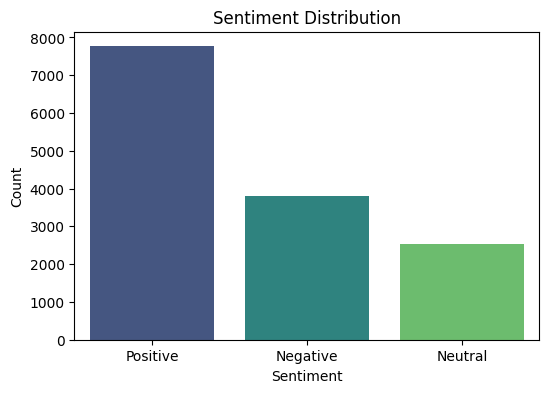

C:\Users\USER\AppData\Local\Temp\ipykernel_21192\1239841663.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment_label", y="combined_score", data=df_filtered, palette="Set2")


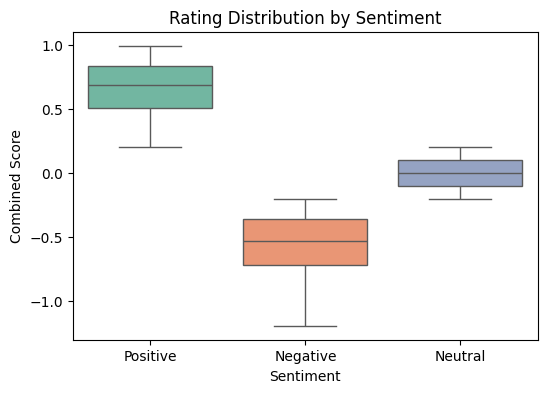

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="sentiment_label", data=df_filtered, palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 2. Rating vs Sentiment Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x="sentiment_label", y="combined_score", data=df_filtered, palette="Set2")
plt.title("Rating Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Combined Score")
plt.show()




In [75]:
import sys
import os
import pandas as pd

# Add the root directory of the project to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))


# Import functions from the src module
from data_preprocessing.processing_text import preprocess_text
from data_annotation.annotation import annotate_data, get_sentiment_score, combine_scores, assign_sentiment_label
# from topic_modeling.LDA import perform_lda, display_lda_topics
# from topic_modeling.insight import summarize_insights
from utils.load_data import load_data



In [62]:
# %pip install gensim

In [37]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: E:\sentiment_analysis


#### NMF method for topic modeling

In [3]:
# Cell In[16]
import pandas as pd
import os
import sys
import importlib
import topic_modeling.NMF

# Force reload the module to ensure the updated NMFTopicModel is used
importlib.reload(topic_modeling.NMF)
from topic_modeling.NMF import NMFTopicModel

# Adjust the Python path to include the parent directory
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Debug: Print the path of the imported module
print(f"Using NMF.py from: {topic_modeling.NMF.__file__}")

# Define load_data function
def load_data(filepath):
    df = pd.read_csv(filepath)
    return df

# Load customer feedback
nmf = load_data(r"E:\sentiment_analysis\notebooks\annotated_data.csv")
customer_feedback = nmf['cleaned_review'].dropna()  # Ensure no NaN values

# Initialize and fit NMF topic model
nmf_model = NMFTopicModel(num_topics=5)
nmf_model.fit(customer_feedback)

# Extract and display top words per topic
topics = nmf_model.get_top_words()
for topic_id, words in topics.items():
    print(f"Topic {topic_id}: {', '.join(words)}")

# Define custom topic names (adjusted to 5 topics to match num_topics=5)
topic_names = {
    0: "Recommendation",
    1: "Experience",
    2: "Pricing",
    3: "Scheduling",
    4: "Environment"
}

# Assign topic names and predict topics
nmf_model.assign_topic_names(topic_names)
df_results = nmf_model.predict_topics(customer_feedback)

# Debug: Check if save_model exists
print("Methods available in nmf_model:", dir(nmf_model))

# Save the model
nmf_model.save_model("topic_modeling/nmf_model.joblib")

# Combine results with original data
df_final = pd.concat([nmf.reset_index(drop=True), df_results.reset_index(drop=True)], axis=1)
print(df_final.head())

Using NMF.py from: e:\sentiment_analysis\topic_modeling\NMF.py
Topic 0: good, overall, trip, experience, company, services, driver, travel, price, job
Topic 1: bus, late, hours, arrived, hour, time, left, phnom, took, minutes
Topic 2: service, excellent, use, recommend, highly, best, friendly, time, poor, efficient
Topic 3: driver, comfortable, time, safe, trip, fast, nice, driving, friendly, van
Topic 4: great, trip, experience, ride, thanks, overall, travel, thank, company, use
Methods available in nmf_model: ['H', 'W', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'assign_topic_names', 'feature_names', 'fit', 'get_top_words', 'load_model', 'max_features', 'nmf_model', 'num_t

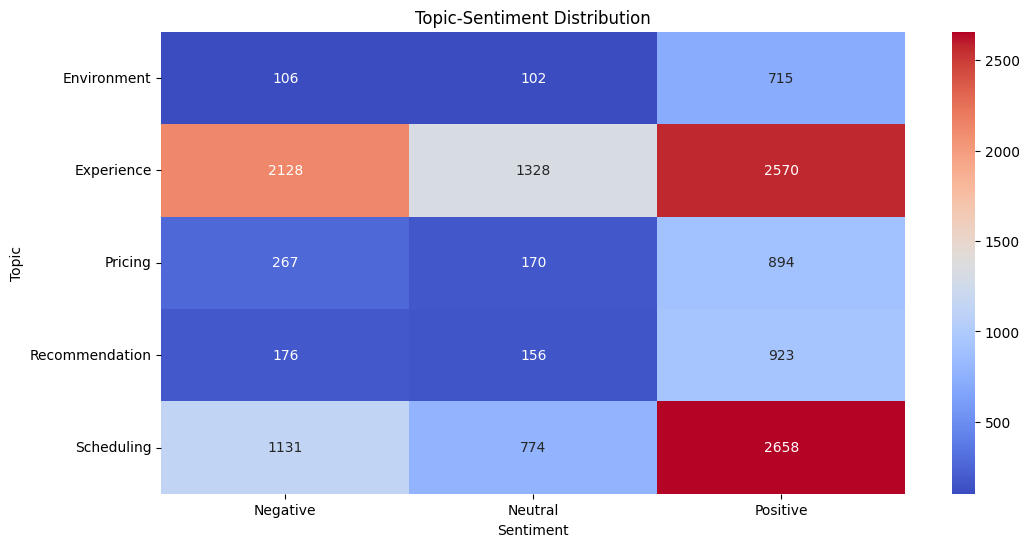

In [4]:
# Plot heatmap to visualize topic-sentiment distribution
if 'sentiment_label' in df_final.columns:
    # Aggregate sentiment per topic
    sentiment_counts = df_final.groupby(["Topic Name", "sentiment_label"]).size().unstack().fillna(0)

    # Visualize topic-sentiment distribution
    plt.figure(figsize=(12, 6))
    sns.heatmap(sentiment_counts, cmap="coolwarm", annot=True, fmt="g")
    plt.title("Topic-Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Topic")
    plt.show()
else:
    print("The 'sentiment_label' column is missing in the data. Ensure sentiment analysis is performed.")

In [ ]:
# %pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


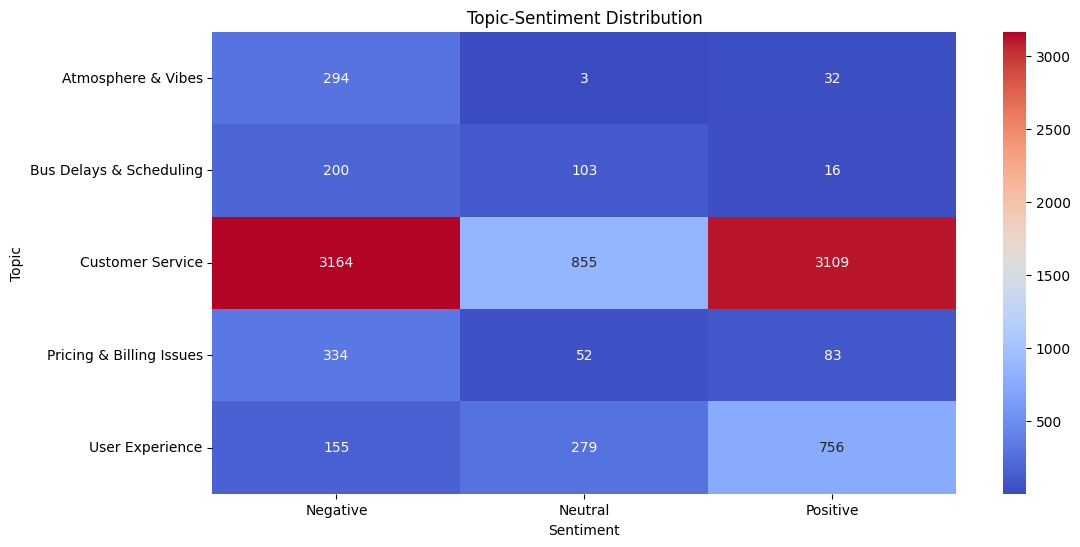

In [7]:
# visualization.ipynb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load processed data
df = pd.read_csv(r"E:\sentiment_analysis\notebooks\nmf_results.csv")

# Aggregate sentiment per topic
sentiment_counts = df.groupby(["Topic Name", "sentiment_label"]).size().unstack().fillna(0)

# Visualize topic-sentiment distribution
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_counts, cmap="coolwarm", annot=True, fmt="g")
plt.title("Topic-Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Topic")
plt.show()


Preprocessing texts...


INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary<8767 unique tokens: ['easy', 'fast', 'angkor', 'break', 'driver']...>


Training LDA model...


INFO:gensim.corpora.dictionary:built Dictionary<10422 unique tokens: ['easy', 'fast', 'angkor', 'break', 'driver']...> from 14087 documents (total 182109 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<10422 unique tokens: ['easy', 'fast', 'angkor', 'break', 'driver']...> from 14087 documents (total 182109 corpus positions)", 'datetime': '2025-05-05T10:48:00.143791', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'created'}
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 5 topics, 10 passes over the supplied corpus of 14087 documents, updating model once every 2000 documents, evaluating perplexity every 14087 documents, iterating 50x w

LDA Coherence Score: 0.5176
Training LSA model...


INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>


LSA Reconstruction Error: 0.0002
Evaluating number of topics...


INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary<8767 unique tokens: ['easy', 'fast', 'angkor', 'break', 'driver']...>
INFO:gensim.corpora.dictionary:built Dictionary<10422 unique tokens: ['easy', 'fast', 'angkor', 'break', 'driver']...> from 14087 documents (total 182109 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<10422 unique tokens: ['easy', 'fast', 'angkor', 'break', 'driver']...> from 14087 documents (total 182109 corpus positions)", 'datetime': '2025-05-05T10:48:51.383887', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'created'}
INFO:gensim.models.ldamodel:using symmetric alpha at 0.3333333333333333
INFO:gensim.models.ldamodel:using symmetric eta at 0.3333333333333333
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training,

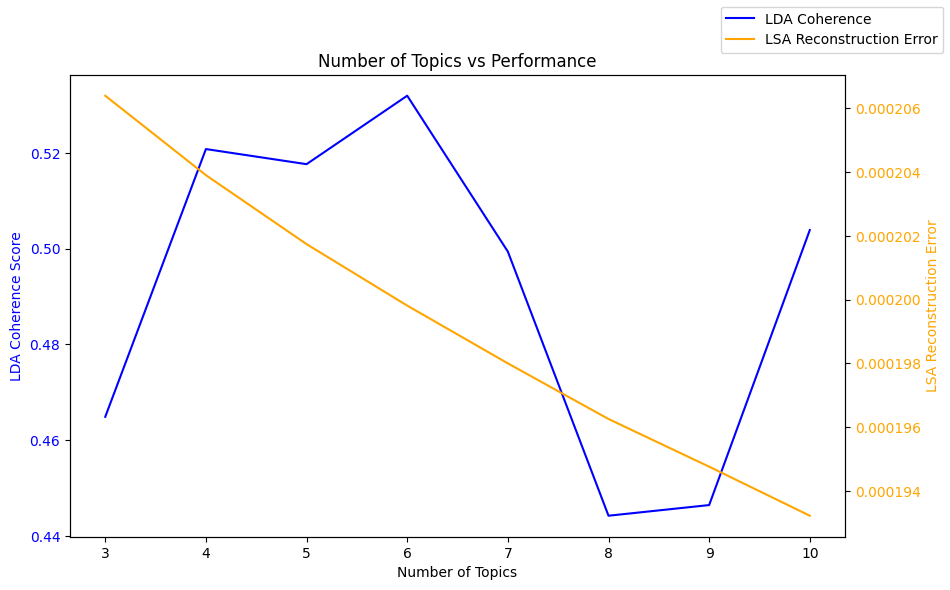

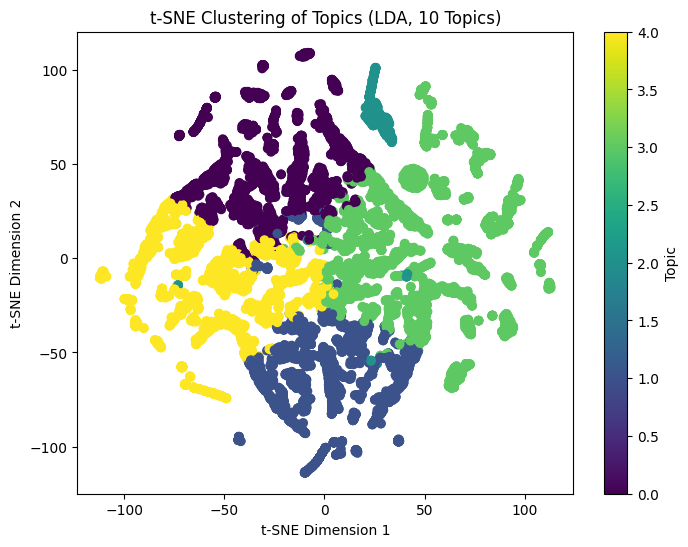

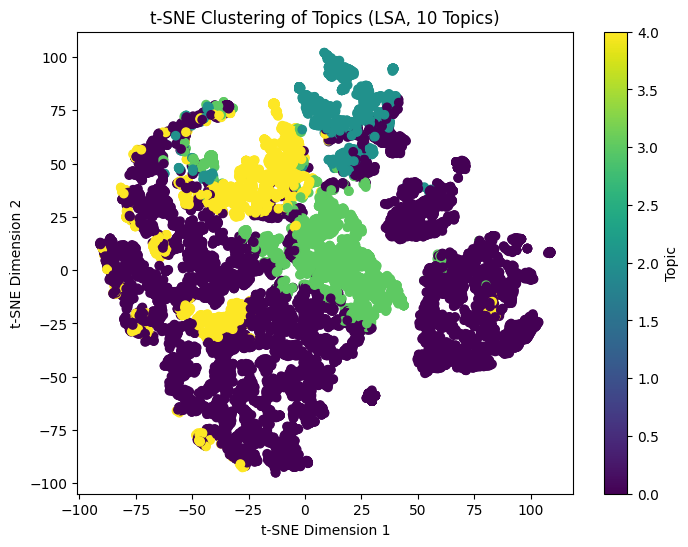


LDA Topics:


Driver (Topic 0): driver, not, drive, very, seat, phone, van, work, fast, time
Bus (Topic 1): bus, not, seat, book, no, ticket, very, border, company, staff
De À (Topic 2): de, à, le, et, chauffeur, ur, carelessly, très, la, pas
Good (Topic 3): good, very, service, driver, great, comfortable, time, trip, safe, recommend
Hour Bus (Topic 4): hour, bus, time, late, arrive, stop, no, leave, not, take

LSA Topics:
Good Service (Topic 0): good, service, driver, bus, time, trip, comfortable, great, arrive, stop
Good Service (Topic 1): good, service, punctality, expérience, puntual, tks, vey, fluently, vert, organised
Great Service (Topic 2): service, great, excellent, thank, recommend, use, highly, friendly, punctual, efficient
Driver (Topic 3): driver, drive, fast, safe, great, nice, comfortable, trip, friendly, thank
Great Trip (Topic 4): great, trip, comfortable, bus, nice, thank, ride, seat, wifi, clean


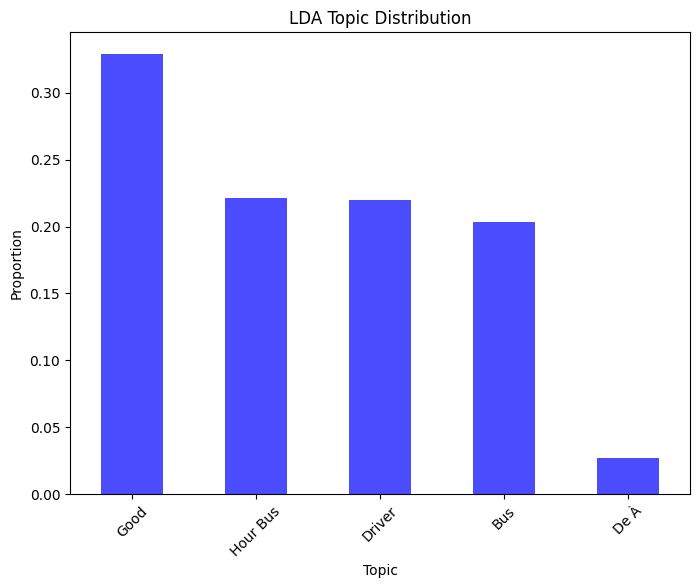

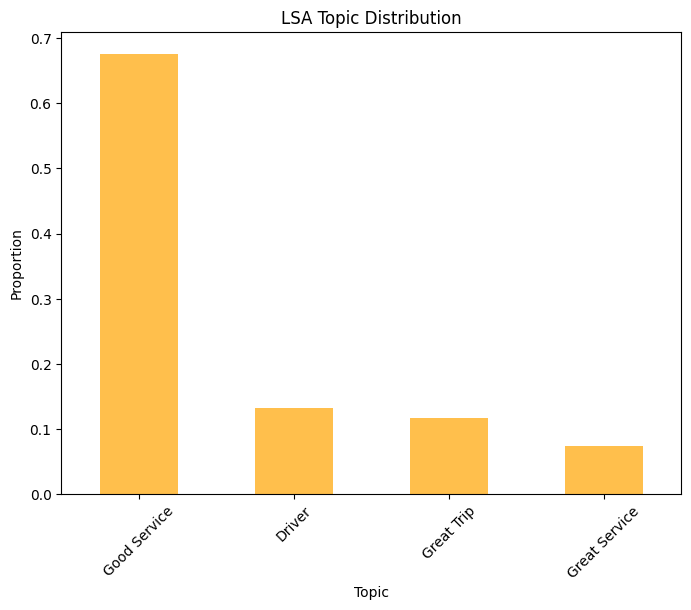


Processed DataFrame with Topics:
                                              Review  \
0                                      easy and fast   
1  We traveled from Phnom Penh to Siem Reap by Se...   
2  Booking tickets thru bookmebus.com is always e...   
3  In Mekong express There was no wifi. The drive...   
4  Trip went smoothly, border crossing was easy, ...   

                                      Processed_Text Topic_Name_LDA  \
0                                          easy fast           Good   
1  travel phnom penh siem reap seila angkor van d...           Good   
2  book ticket bookmebuscom easy reliable guest f...            Bus   
3  mekong express no wifi driver run very very fa...       Hour Bus   
4  trip go smoothly border cross easy food bevera...           Good   

  Topic_Name_LSA  
0         Driver  
1   Good Service  
2   Good Service  
3         Driver  
4  Great Service  


In [1]:

import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# topic_modeling_evaluation.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Import preprocessing functions (adjust the import paths as needed)
from data_preprocessing.text_cleaning import clean_text
from data_preprocessing.tokenizer import tokenize_text
from data_preprocessing.remove_stopword import remove_stopwords
from data_preprocessing.lemmatize import lemmatize_tokens

# Import the LDA and LSA modules
import topic_modeling.LDA as lda
import topic_modeling.lsa as lsa

# Load your dataset (replace with your actual dataset path)
data_path = r"E:\sentiment_analysis\notebooks\preprocessed_data.csv"  # e.g., "reviews.csv"
df = pd.read_csv(data_path)

# Assume the dataset has a column 'Review' containing the text data
text_column = 'Review'

# Step 1: Preprocess the texts
print("Preprocessing texts...")
df['Processed_Text'] = df[text_column].apply(
    lambda x: lda.preprocess_text(x, clean_text, tokenize_text, remove_stopwords, lemmatize_tokens)
)
processed_texts = df['Processed_Text'].dropna().tolist()

# Step 2: Train LDA and LSA models
num_topics = 5  # Default number of topics
naming_method = "pos"  # Choose "simple" or "embedding" for topic naming
num_name_words = 2  # Number of words to use in the topic name (for simple method)

# Train LDA
print("Training LDA model...")
lda_model, dictionary, corpus = lda.train_lda_model(processed_texts, num_topics=num_topics, passes=10)
if lda_model and dictionary:
    df['Topic_LDA'] = df['Processed_Text'].apply(
        lambda x: lda.get_topic_lda(x, lda_model, dictionary) if x else None
    )
    coherence_lda = lda.compute_lda_coherence(lda_model, processed_texts, dictionary)
    print(f"LDA Coherence Score: {coherence_lda:.4f}")
else:
    print("LDA training failed.")
    coherence_lda = None

# Train LSA
print("Training LSA model...")
lsa_model, vectorizer, lsa_topic_matrix = lsa.train_lsa_model(processed_texts, num_topics=num_topics)
if lsa_model and vectorizer:
    df['Topic_LSA'] = df['Processed_Text'].apply(
        lambda x: lsa.get_topic_lsa(x, lsa_model, vectorizer) if x else None
    )
    reconstruction_error_lsa = lsa.compute_lsa_reconstruction_error(processed_texts, vectorizer, lsa_model)
    print(f"LSA Reconstruction Error: {reconstruction_error_lsa:.4f}")
else:
    print("LSA training failed.")
    reconstruction_error_lsa = None

# Step 3: Evaluate the models for different numbers of topics
min_topics = 3
max_topics = 10
topic_range = range(min_topics, max_topics + 1)
lda_coherences = []
lsa_errors = []

print("Evaluating number of topics...")
for num_topics in topic_range:
    # LDA
    temp_lda_model, temp_dictionary, _ = lda.train_lda_model(processed_texts, num_topics=num_topics)
    if temp_lda_model and temp_dictionary:
        coherence = lda.compute_lda_coherence(temp_lda_model, processed_texts, temp_dictionary)
        lda_coherences.append(coherence if coherence else 0)
    else:
        lda_coherences.append(0)
    
    # LSA
    temp_lsa_model, temp_vectorizer, _ = lsa.train_lsa_model(processed_texts, num_topics=num_topics)
    if temp_lsa_model and temp_vectorizer:
        error = lsa.compute_lsa_reconstruction_error(processed_texts, temp_vectorizer, temp_lsa_model)
        lsa_errors.append(error if error else float('inf'))
    else:
        lsa_errors.append(float('inf'))

# Plot the number of topics vs performance
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(topic_range, lda_coherences, label='LDA Coherence', color='blue')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('LDA Coherence Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(topic_range, lsa_errors, label='LSA Reconstruction Error', color='orange')
ax2.set_ylabel('LSA Reconstruction Error', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.legend(loc='upper right')
plt.title("Number of Topics vs Performance")
plt.show()

# Step 4: Visualize topic separation using t-SNE
# For LDA
if lda_model and len(processed_texts) > 1:
    lda_topic_matrix = np.zeros((len(processed_texts), num_topics))
    for i, text in enumerate(processed_texts):
        bow = dictionary.doc2bow(text.split())
        topics = lda_model.get_document_topics(bow)
        for topic_id, prob in topics:
            lda_topic_matrix[i, topic_id] = prob
    
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results_lda = tsne.fit_transform(lda_topic_matrix)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_results_lda[:, 0], tsne_results_lda[:, 1], c=np.argmax(lda_topic_matrix, axis=1), cmap='viridis')
    plt.colorbar(scatter, label='Topic')
    plt.title(f"t-SNE Clustering of Topics (LDA, {num_topics} Topics)")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()

# For LSA
if lsa_model and len(processed_texts) > 1:
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results_lsa = tsne.fit_transform(lsa_topic_matrix)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_results_lsa[:, 0], tsne_results_lsa[:, 1], c=np.argmax(lsa_topic_matrix, axis=1), cmap='viridis')
    plt.colorbar(scatter, label='Topic')
    plt.title(f"t-SNE Clustering of Topics (LSA, {num_topics} Topics)")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()

# Step 5: Final Topic Identification - Display top words and dynamically name topics
# For LDA
if lda_model:
    print("\nLDA Topics:")
    lda_topic_names = lda.generate_lda_topic_names(
        lda_model,
        num_words=10,
        naming_method=naming_method,
        num_name_words=num_name_words
    )
    lda_topics = lda.get_top_words_lda(lda_model, num_words=10)
    for topic_id, (words, weights) in lda_topics.items():
        topic_name = lda_topic_names.get(topic_id, "Unknown Topic")
        print(f"{topic_name} (Topic {topic_id}): {', '.join(words)}")
    # Map topic names to the DataFrame
    df['Topic_Name_LDA'] = df['Topic_LDA'].map(lda_topic_names)
    
    # Save LDA topic names for manual adjustment
    with open("lda_topic_names.txt", "w") as f:
        for topic_id, name in lda_topic_names.items():
            f.write(f"Topic {topic_id}: {name}\n")

# For LSA
if lsa_model and vectorizer:
    print("\nLSA Topics:")
    lsa_topic_names = lsa.generate_lsa_topic_names(
        lsa_model,
        vectorizer,
        num_words=10,
        naming_method=naming_method,
        num_name_words=num_name_words
    )
    lsa_topics = lsa.get_top_words_lsa(lsa_model, vectorizer, num_words=10)
    for topic_id, (words, weights) in lsa_topics.items():
        topic_name = lsa_topic_names.get(topic_id, "Unknown Topic")
        print(f"{topic_name} (Topic {topic_id}): {', '.join(words)}")
    # Map topic names to the DataFrame
    df['Topic_Name_LSA'] = df['Topic_LSA'].map(lsa_topic_names)
    
    # Save LSA topic names for manual adjustment
    with open("lsa_topic_names.txt", "w") as f:
        for topic_id, name in lsa_topic_names.items():
            f.write(f"Topic {topic_id}: {name}\n")

# Step 6: Compare Topic Distributions
# LDA Topic Distribution
if 'Topic_Name_LDA' in df:
    plt.figure(figsize=(8, 6))
    df['Topic_Name_LDA'].value_counts(normalize=True).plot(kind='bar', color='blue', alpha=0.7)
    plt.title("LDA Topic Distribution")
    plt.xlabel("Topic")
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.show()

# LSA Topic Distribution
if 'Topic_Name_LSA' in df:
    plt.figure(figsize=(8, 6))
    df['Topic_Name_LSA'].value_counts(normalize=True).plot(kind='bar', color='orange', alpha=0.7)
    plt.title("LSA Topic Distribution")
    plt.xlabel("Topic")
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.show()

# Display the processed DataFrame with topics
print("\nProcessed DataFrame with Topics:")
print(df[[text_column, 'Processed_Text', 'Topic_Name_LDA', 'Topic_Name_LSA']].head())

In [10]:
# %pip install --upgrade pip setuptools wheel
# %pip install --upgrade cython
# %pip install --upgrade gensim

In [4]:
# Step 2.5: Save the models for use in Streamlit
import joblib
import os

# Create a directory to save the models
model_dir = "E:/sentiment_analysis/models"
os.makedirs(model_dir, exist_ok=True)

# Save LDA model and dictionary
if lda_model and dictionary:
    lda_model.save(os.path.join(model_dir, "lda_model"))
    dictionary.save(os.path.join(model_dir, "lda_dictionary"))
    print("LDA model and dictionary saved.")

# Save LSA model and vectorizer
if lsa_model and vectorizer:
    joblib.dump(lsa_model, os.path.join(model_dir, "lsa_model.joblib"))
    joblib.dump(vectorizer, os.path.join(model_dir, "lsa_vectorizer.joblib"))
    print("LSA model and vectorizer saved.")

# Save topic names (already saved in Step 5 as lda_topic_names.txt and lsa_topic_names.txt)

INFO:gensim.utils:LdaState lifecycle event {'fname_or_handle': 'E:/sentiment_analysis/models\\lda_model.state', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2025-03-25T09:44:58.664849', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'saving'}
INFO:gensim.utils:saved E:/sentiment_analysis/models\lda_model.state
INFO:gensim.utils:LdaModel lifecycle event {'fname_or_handle': 'E:/sentiment_analysis/models\\lda_model', 'separately': "['expElogbeta', 'sstats']", 'sep_limit': 10485760, 'ignore': ['id2word', 'dispatcher', 'state'], 'datetime': '2025-03-25T09:44:58.778144', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'saving'}
INFO:gensim.utils:storing np array 'expElogbeta' to E:/sentiment_analysis/models\lda_model.expElogbeta.

LDA model and dictionary saved.
LSA model and vectorizer saved.
